<a href="https://colab.research.google.com/github/SpaceSapiens/Code-Explorer/blob/IITM_Course/Polynomial_regression_MLT_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combine the linear regression units to form a single class

In [ ]:
#For proper rendering of latex in colab
from IPython.display import display,Math,Latex 

import numpy as np

#Import to generate plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
class LinReg(object):
  #X: Feature Matrix
  #w: weight vector
  #y: label vector

  def _init(self):
    self.t0=200
    self.t1=1000
  
  def predict(self,X:np.array):
    #Predict output label for the given input
    #Input: X
    #output: y

    y=X@self.w
    return y
  
  def loss(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate loss of a model based on the known labels
    e=y-self.predict(X)
    return (1/2)*(np.transpose(e)*e)
  
  def rmse(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate root mean squared error w.r.t actual label
    
    return np.sqrt((2/X.shape[0])*self.loss(X,y))
  
  def fit(self,X:np.ndarray,y:np.ndarray)->float:
    #Estimate the parameters of linear regression using normal equation
    self.w=np.linalg.pinv(X)@y
    return self.w
  
  def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate gradient w.r.t to weight vector on training set
    return np.transpose(X)@(self.predict(X)-y)
  
  def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
    #Updates the weights based on the gradient
    return (self.w-lr*grad)
  
  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,lr:float)->np.ndarray:
    #Estimate parameters of linear regression through Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations

    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))

    for i in np.arange(0,num_epoch):
      #Gradient
      dJdw=self.calculate_gradient(X,y)
      self.w_all.append(self.w)
      #Calculate loss
      self.err_all.append(self.loss(X,y))
      #Update Weight
      self.w=self.update_weight(dJdw,lr)     
    return self.w

  def mbgd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,minibatch_size:int)->np.ndarray:
    #Estimate parameters of linear regression through Mini Batch Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations
    mini_batch_id=0   
    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))  

    for epoch in range(num_epoch):
      #Selection of small number of examples
      #Shuffle indices to select random elements (MBGD)
      shuffled_indices=np.random.permutation(X.shape[0])
      X_shuffled=X[shuffled_indices]
      y_shuffled=y[shuffled_indices]
      for i in range(0,X.shape[0],minibatch_size):
        mini_batch_id+=1
        Xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        
        self.w_all.append(self.w)
        #calculate error
        self.err_all.append(self.loss(Xi,yi))
        #Gradient Calculation
        dJdw=2/minibatch_size*self.calculate_gradient(Xi,yi)
        
        self.w=self.update_weight(dJdw,self.learning_schedule(mini_batch_id))     

    return self.w
  def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
    self.w_all=[] #All parameters across epochs
    self.err_all=[] #Respective errors

    #Parameter vector initialized to 0
    w=np.zeros((X.shape[1]))
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index=np.random.randint(X.shape[0])
        xi=X[random_index:random_index+1]
        yi=y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        gradients=2*self.calculate_gradient(xi,yi)
        lr=self.learning_schedule(epoch*X.shape[0]+i)
        self.w=self.update_weight(gradients,lr)      

    return self.w




---
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡
# **WEEK3**








# **Polynomial Regression**

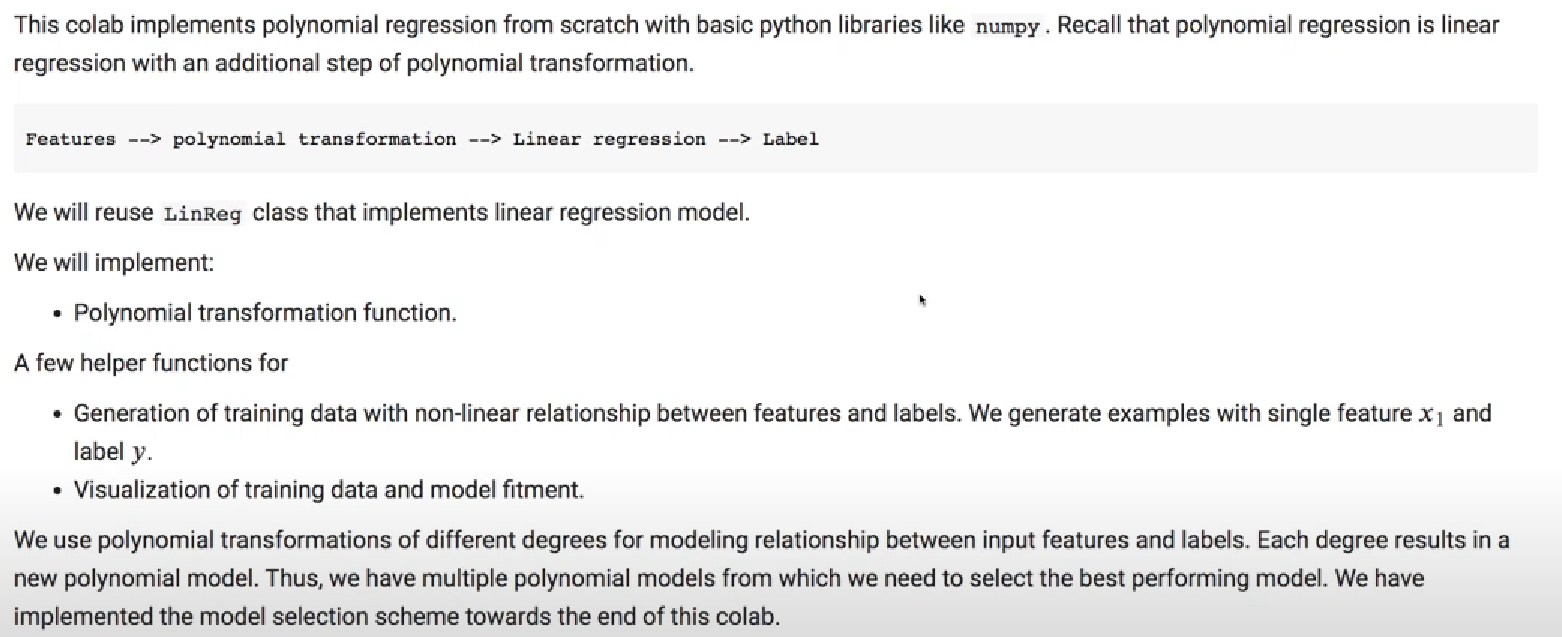

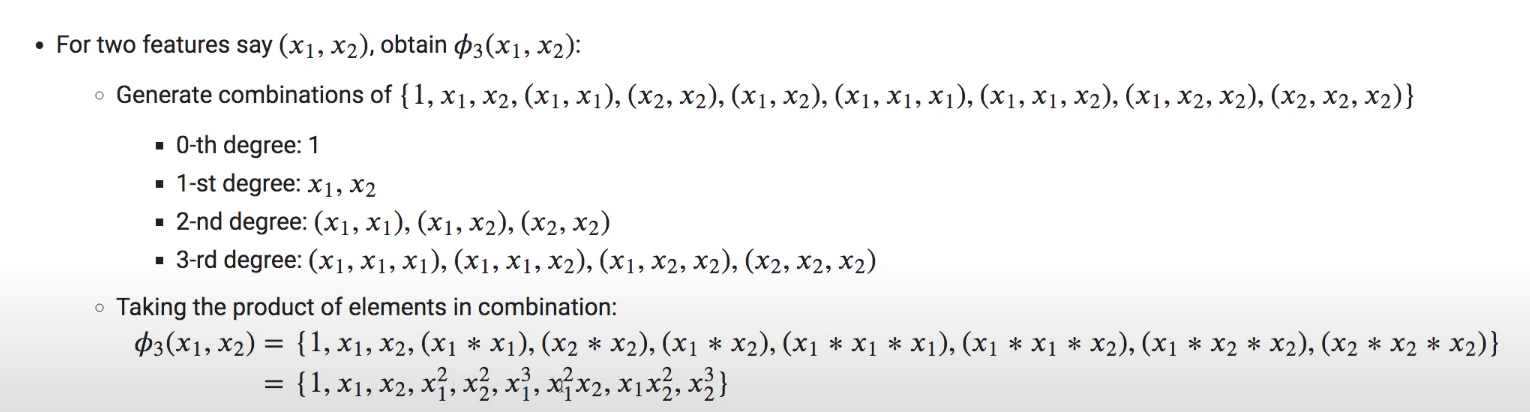

In [ ]:
#Write a function to get the combination of polynomial elements
import itertools
import functools
def get_combinations(X,degree):
  return itertools.combinations_with_replacement(X,degree)

In [ ]:
#Write function to compute new features
#if item = [1,2,3,4,5] function returns (((1*2)*3)*4)*5
def compute_new_feature(items):
  return functools.reduce(lambda x,y:x*y,items)

In [ ]:
#Check the generated functions
#Feature =1 degree=3
{items:compute_new_feature(items)for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [ ]:
#Feature =2 degree=3
{items:compute_new_feature(items)for items in get_combinations([2,3],3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [ ]:
#Feature =2 degree=4
{items:compute_new_feature(items)for items in get_combinations([2,3],4)}

{(2, 2, 2, 2): 16,
 (2, 2, 2, 3): 24,
 (2, 2, 3, 3): 36,
 (2, 3, 3, 3): 54,
 (3, 3, 3, 3): 81}

Polynomial Transform Function

In [ ]:
import numpy as np
import itertools
import functools
#Create the function
def polynomial_transform(x,degree,logging=False):
  #Convert to feature matrix
  if(x.ndim==1):
    x=x[:,None]
  #Transpose the feature matrix
  x_t=x.transpose() 
  #Populate all 1s as first feature
  features=[np.ones(len(x))]

  if logging:
    print("Input: ",x)
  #Generate combination for all degrees
  for current_degree in range(1,degree+1):
    #Combine features into a new feature
    for items in get_combinations(x_t,current_degree):
      features.append(compute_new_feature(items))
      if logging:
        print(items," : ",compute_new_feature(items))
  if logging:
    print(np.asarray(features).transpose())
  #Return the new feature array
  return np.asarray(features).transpose()


In [ ]:
#Test the polynomial transformation
#Feature=1, degree=3
polynomial_transform(np.array([2]),3,True)

Input:  [[2]]
(array([2]),)  :  [2]
(array([2]), array([2]))  :  [4]
(array([2]), array([2]), array([2]))  :  [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
#Feature=2, degree=2
#2 examples of single feature each, at 2 degree
polynomial_transform(np.array([2,3]),2,True)

Input:  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [ ]:
#2 examples of 2 feature each, at 2 degree
polynomial_transform(np.array([[2,3],[4,5]]),2,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
#2 examples of 2 feature each, at 3 degree
#Examples = [2,3] and [4,5]
polynomial_transform(np.array([[2,3],[4,5]]),3,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
polynomial_transform(np.array([2]),0,True)

Input:  [[2]]
[[1.]]


array([[1.]])

# Non Linear Data Generation

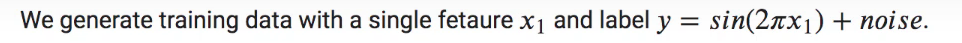

In [ ]:
def create_nonlin_training_set(func,sample_size,std):
  #Sample X within 0,1 with desired number of samples
  x=np.linspace(0,1,sample_size)
  #this will calculate the y based on a function we are passing for every x
  #Adding gaussian noise with the calculated data
  y=func(x)+np.random.normal(scale=std,size=x.shape)
  return x,y

def nonlin(x):
  #Define the function for y in terms of x
  return 2*np.sin(2*np.pi*x)

# Visualization Code

In [20]:
#Function to visualize the data
#For training data
def visualize_training_data(X_train,y_train):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  plt.scatter(X_train,y_train,facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g", label="$\sin(2\pi x)$")
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  plt.legend()
  plt.show()
#For model fit
def visualize_model_fit(X,y,lin_reg,degree):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  if(degree>0):
    plt.scatter(X,y,facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g", label="$\sin(2\pi x)$")

  y_hat=lin_reg.predict(polynomial_transform(points,degree,True))
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  plt.ylim(-1.5,1.5)
  plt.title("M={}".format(degree))#, xy=(-0.15,1)



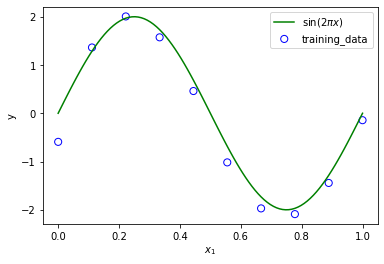

In [21]:
#Check the function using 10 samples and std = 0.2
num_samples=10
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)